In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_csv("FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [24]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


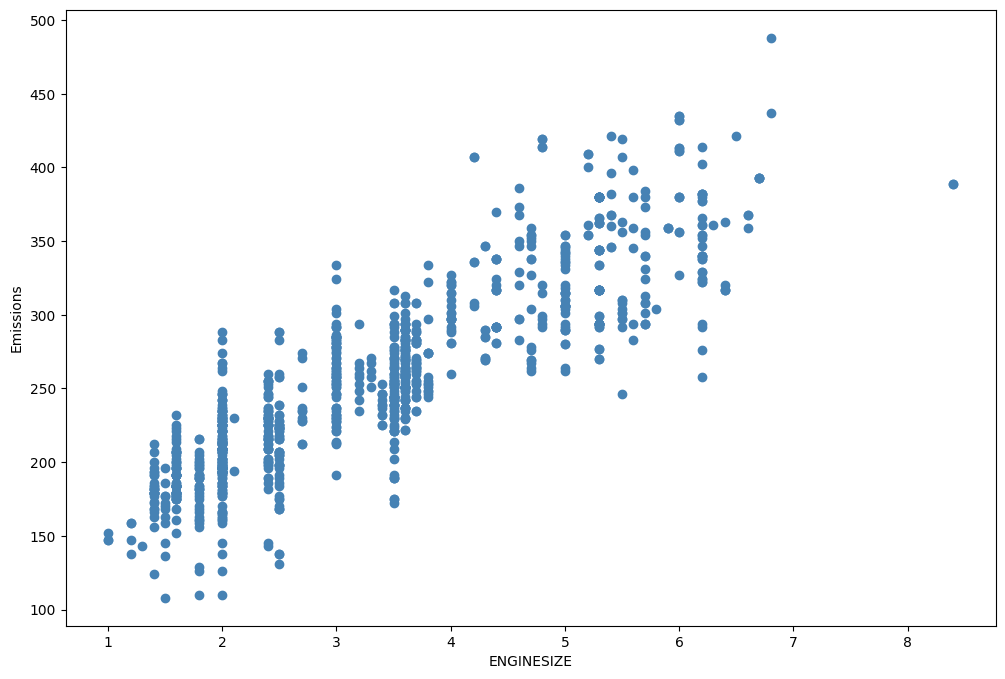

In [25]:
plt.rcParams['figure.figsize']=(12,8)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
train, test  =  train_test_split(df,test_size=0.2)

In polynomial regression, the relationship btw the independent variable x and the dependent variable y is modeled as nth degree polynomial in X.

2nd degree: y= θ0 + θ1 x + θ2 x^2
For example, the original feature set has only one feature: ENGINESIZE If we select the degree of the polynomial to be 2: It generates 3 features: degree=0, degree=1, degree=2

In [27]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [28]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    4.7  22.09]
 [ 1.    3.    9.  ]
 [ 1.    1.6   2.56]
 ...
 [ 1.    4.4  19.36]
 [ 1.    6.   36.  ]
 [ 1.    3.6  12.96]]


Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into: y = θ0 + θ1 x1 + θ2 x2

Polynomial regression is a special case of linear regression, with selection your features.

In [29]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [30]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.42714904 -1.60245181]]
Intercept: [109.55163879]


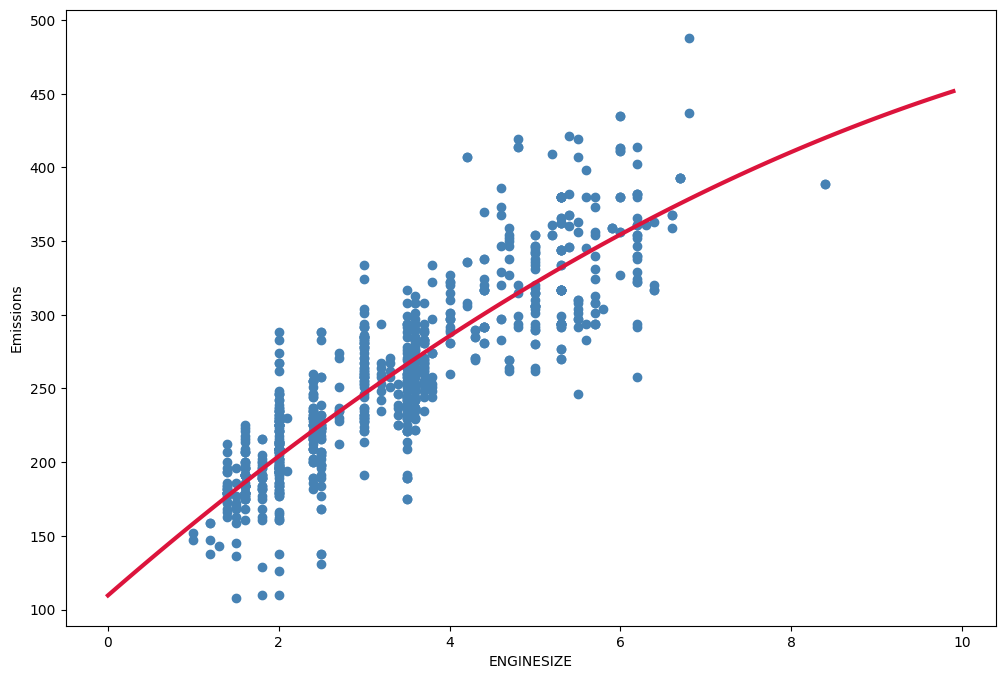

In [31]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [32]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[109.55163879 114.57832918 119.57297053 124.53556284 129.46610612
 134.36460036 139.23104557 144.06544174 148.86778887 153.63808697
 158.37633603 163.08253605 167.75668704 172.39878899 177.00884191
 181.58684579 186.13280063 190.64670644 195.12856321 199.57837095
 203.99612965 208.38183931 212.73549994 217.05711153 221.34667408
 225.6041876  229.82965208 234.02306753 238.18443394 242.31375131
 246.41101965 250.47623895 254.50940922 258.51053045 262.47960264
 266.4166258  270.32159992 274.19452501 278.03540105 281.84422807
 285.62100604 289.36573498 293.07841489 296.75904576 300.40762759

Evaluation
- Mean Absolute Error(MAE)

In [33]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 24.43
Mean Squared Error (MSE): 970.89
R2-Score: 0.77


Practise 
Try to use a polynomial regression with the dataset but this time with degree three(cubic).
Does it result in better accuracy?

In [35]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)

In [36]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[  1.      4.7    22.09  103.823]
 [  1.      3.      9.     27.   ]
 [  1.      1.6     2.56    4.096]
 ...
 [  1.      4.4    19.36   85.184]
 [  1.      6.     36.    216.   ]
 [  1.      3.6    12.96   46.656]]


In [37]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [38]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         37.63993473  1.89512453 -0.2880161 ]]
Intercept: [123.21280972]


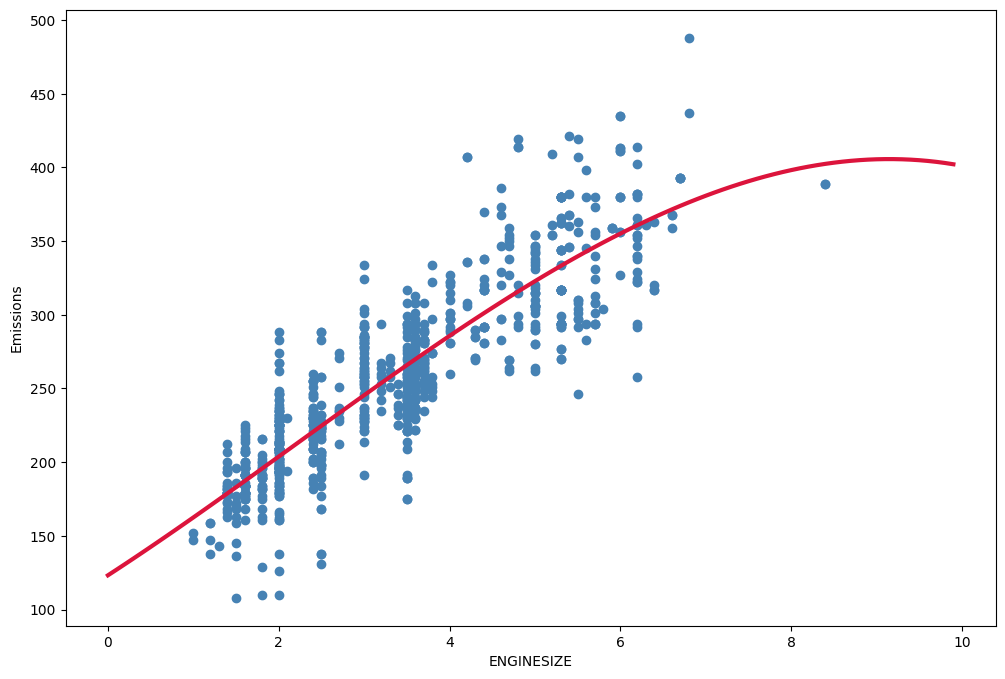

In [39]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [40]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[123.21280972 126.99546642 130.81429752 134.66757491 138.5535705
 142.4705562  146.41680391 150.39058553 154.39017296 158.41383811
 162.45985288 166.52648918 170.6120189  174.71471396 178.83284625
 182.96468768 187.10851015 191.26258556 195.42518583 199.59458285
 203.76904852 207.94685475 212.12627344 216.3055765  220.48303583
 224.65692334 228.82551091 232.98707047 237.13987391 241.28219314
 245.41230006 249.52846657 253.62896457 257.71206598 261.77604269
 265.81916661 269.83970964 273.83594368 277.80614064 281.74857241
 285.66151092 289.54322805 293.39199571 297.20608581 300.98377024


In [41]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 24.37
Mean Squared Error (MSE): 960.83
R2-Score: 0.77


3.dereceden polinomial regression örneği çıktıları:
Mean Absolute Error (MAE): 24.37
Mean Squared Error (MSE): 960.83
R2-Score: 0.77